In [1]:
import pandas
dt=pandas.read_csv('C:/Users/HP/Downloads/Rainfall_data.csv')
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [2]:
from sklearn.model_selection import train_test_split
Inp=dt.drop(columns=['Index','Rain'])
Out=dt['Rain']

inp_X,tst_X,out_y,tst_y=train_test_split(Inp,Out,test_size=0.05)

In [3]:
from sklearn.tree import DecisionTreeClassifier
CModel=DecisionTreeClassifier()
CModel.fit(inp_X,out_y)

DecisionTreeClassifier()

In [4]:
CModel.predict([[33,70],[20,55]])

array(['Yes', 'No'], dtype=object)

In [5]:
pred_y=CModel.predict(tst_X)

In [6]:
tst_y

4887      No
10425    Yes
12557    Yes
989       No
17107     No
        ... 
14423    Yes
10735    Yes
9050     Yes
10313     No
11042    Yes
Name: Rain, Length: 1000, dtype: object

In [7]:
cmp=pandas.DataFrame({'Actual Values':tst_y.values,
                     'Predicted Values':pred_y.flatten()})
cmp

,Actual Values,Predicted Values
0,No,No
1,Yes,Yes
2,Yes,No
3,No,No
4,No,Yes
...,...,...
995,Yes,Yes
996,Yes,No
997,Yes,Yes
998,No,No


# Encoding the Labels 'Yes' and 'NO' into numeric values that can be used and Treated as numeric values

In [8]:
from sklearn.preprocessing import LabelEncoder
RainEnc=LabelEncoder()    # RainEnc is an object of the label - encoder class
RainEnc.fit(['Yes','No'])

LabelEncoder()

In [9]:
cmp['Actual Values']=RainEnc.transform(cmp['Actual Values'])
cmp['Predicted Values']=RainEnc.transform(cmp['Predicted Values'])
cmp

,Actual Values,Predicted Values
0,0,0
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
995,1,1
996,1,0
997,1,1
998,0,0


<AxesSubplot:ylabel='Density'>

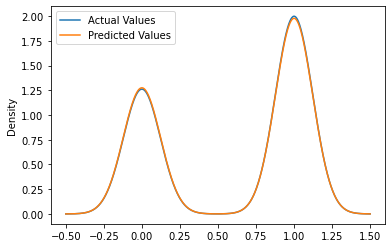

In [10]:
cmp.plot(kind='density')

In [12]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(tst_y,pred_y)*100
print("The accuracy of the model is : ",acc,"%")

The accuracy of the model is :  87.3 %
